## Default of Credit Card Clients

In [125]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import StratifiedShuffleSplit
df_original = pd.read_excel("input/default of credit card clients.xls",header=1)
df_original =df_original.rename({'PAY_0' : 'PAY_1','default payment next month':'default'},axis=1)
df = df_original.copy()
df.columns
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index , test_index in split.split(df,df.iloc[:,[2,-1]]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]
    

![title](img/1129/NT_Dollar.png)

LIMIT_BAL = Balance limit

SEX = 1 = male ; 2= femate

Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

Marital status (1 = married; 2 = single; 3 = others).

Age 

X6 - X11: History of past payment X6 being most recent

-2 exact payment ; -1 paid duly ; 0 = paid minimal monthly payment ; n = delayed for n month 0<n<10

BILL_AMT i : Billing for ith past month

PAY_AMT i : payment for BILL AMT i+1


## BILL_AMT_i : Bill statement for ith past month

## PAY_AMT_i : payment made for Bill statement for i+1 past month

![title](img/1215/Relation%20between%20bill%20amt%20and%20pay%20amt.png)

## Properly defined "Month usage approximation" USAGE_1 to USAGE_5

In [136]:
df_usage = pd.DataFrame()
df_usage['ID']=df.ID
BILL = [column for column in df.columns if 'BILL' in column]
PAY = [column for column in df.columns if 'PAY_AMT' in column]
for i in range(5):
    df_usage[f"USAGE_{i+1}"] = df[BILL[i]]-(df[BILL[i+1]]-df[PAY[i]])


print(BILL+PAY)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


## Validation of relation between Bill and PAY AMT

In [137]:
df_difference =pd.DataFrame()
df_difference['ID'] = df.ID
for i in range(5):
    df_difference[f"DIFF_{i}"] = df[BILL[i+1]]-df[PAY[i]]

In [138]:
df_difference_log=pd.concat([df.ID,df_difference.iloc[:,1:].apply(log_pre_col,axis=0)],axis=1)
rename_dict = {}
for i in df_difference.iloc[:,1:].columns:
    rename_dict[i] = 'log_'+i
df_difference_log =df_difference_log.rename(rename_dict,axis=1)

In [139]:
df.loc[df.PAY_3==-2]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
20349,20350,80000,1,1,2,25,2,2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
23573,23574,300000,2,2,1,39,-2,-2,-2,-2,...,656,620,502,537,142,656,620,502,142,0
23718,23719,600000,2,1,1,53,-2,-2,-2,-2,...,0,6677,83034,27446,0,0,6677,83034,0,0
11565,11566,290000,1,1,2,41,-2,-2,-2,-2,...,6106,14839,11209,0,37578,6136,14913,11264,2296,0
3013,3014,180000,2,1,2,28,-2,-2,-2,-2,...,803,916,1189,1133,572,803,916,1189,375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19376,19377,500000,2,4,2,38,-2,-2,-2,-2,...,40626,9255,8659,2265,24905,40827,30844,8695,3532,0
7319,7320,500000,1,1,1,43,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
25545,25546,360000,2,1,1,36,-2,-2,-2,-2,...,0,3960,0,1992,604,0,3960,0,2313,0
15143,15144,290000,2,1,2,42,-2,-2,-2,-2,...,11767,4684,3685,42863,2632,11780,4684,3685,4352,0


## subject with perfect payment

In [140]:
df.loc[df.ID==23574]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
23573,23574,300000,2,2,1,39,-2,-2,-2,-2,...,656,620,502,537,142,656,620,502,142,0


In [141]:
df_difference.loc[df_difference.ID==23574]

,ID,DIFF_0,DIFF_1,DIFF_2,DIFF_3,DIFF_4
23573,23574,0,0,0,0,0


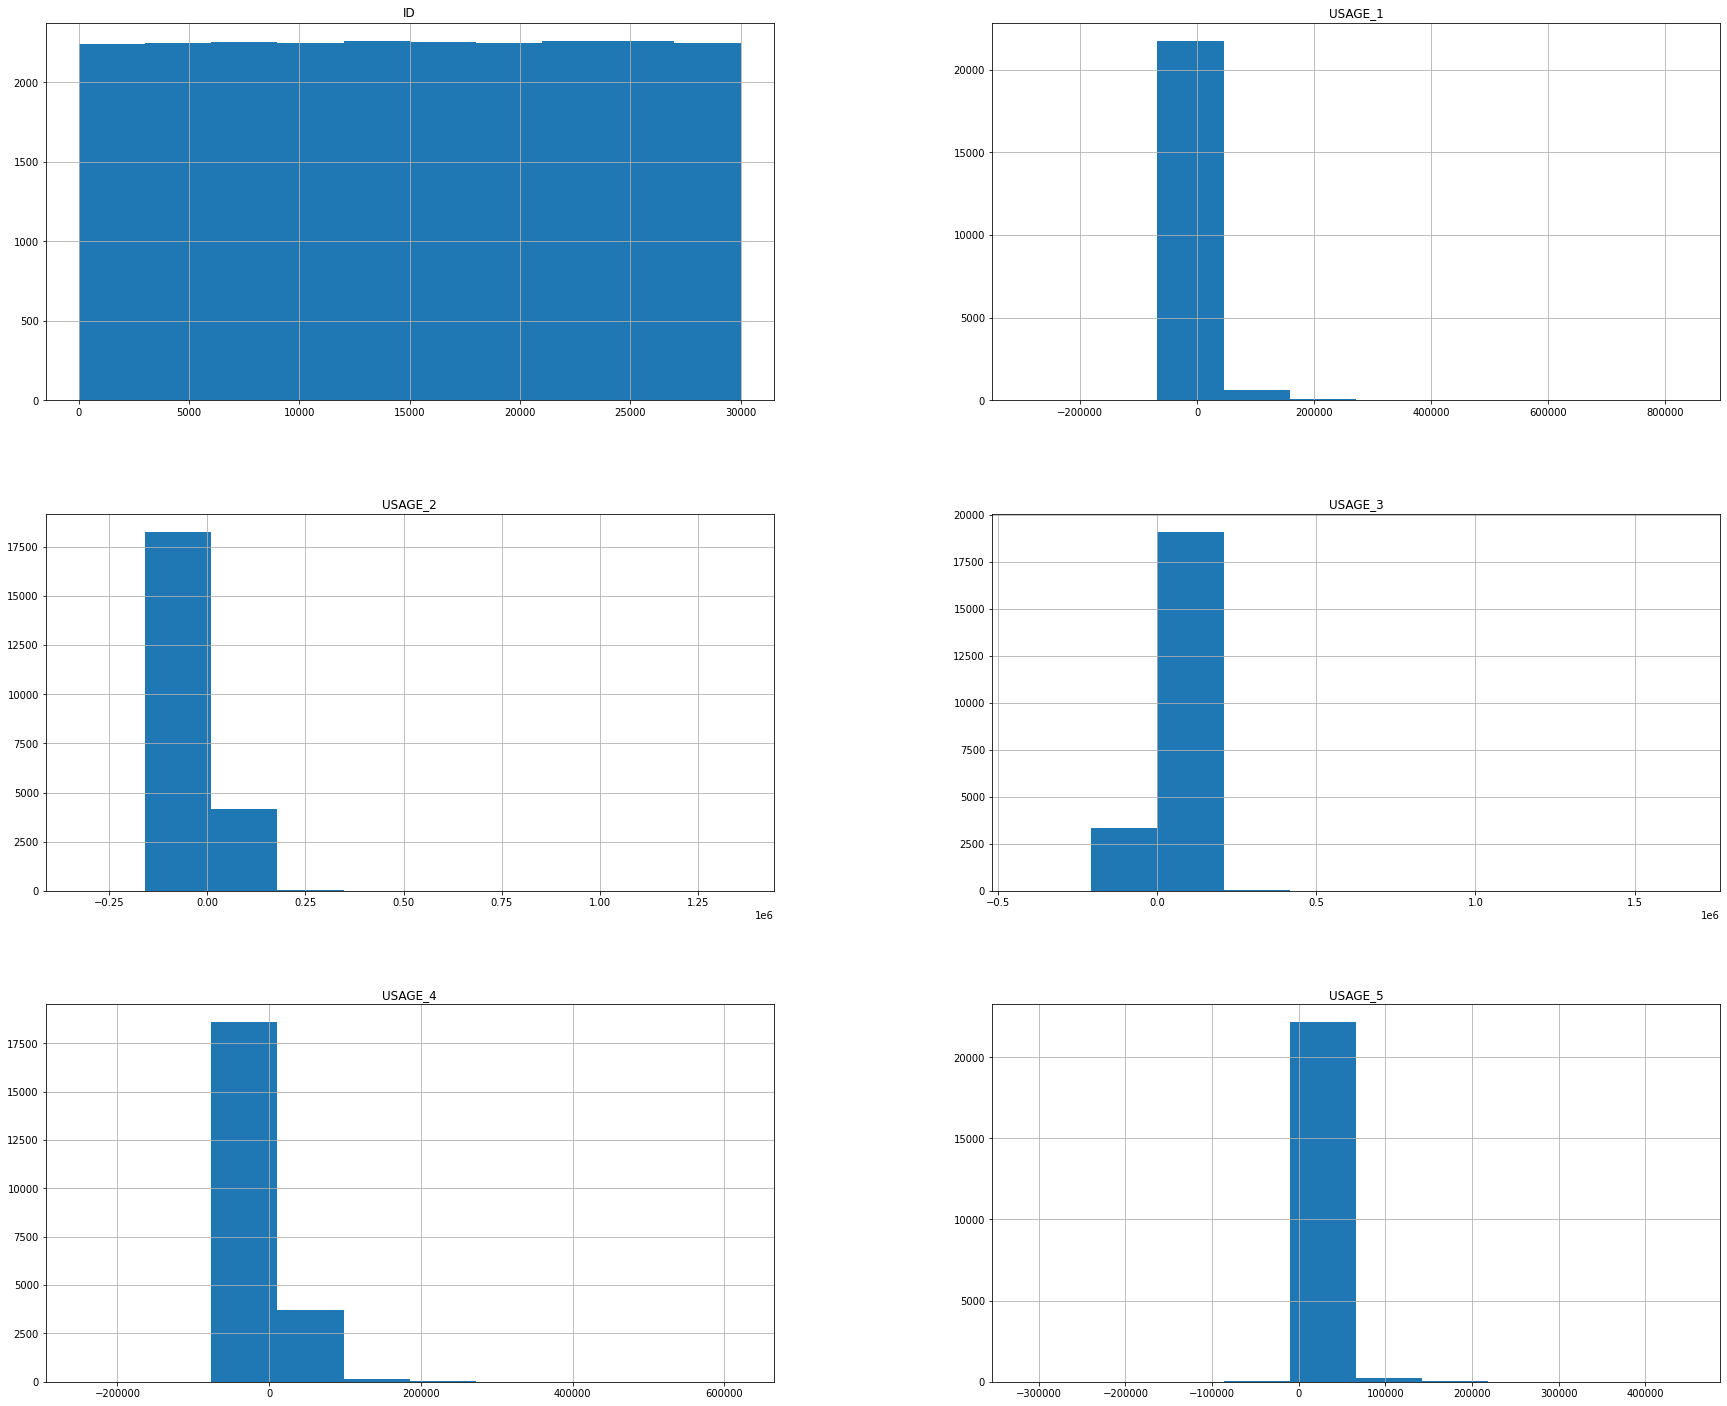

In [142]:
df_usage.hist(figsize=(30,25))
plt.show()

## Dataframe with usage, difference appended

In [143]:
df = pd.concat([df,df_usage.iloc[:,1:],df_difference.iloc[:,1:]],axis=1)

## Logarithmic Scaling attribute for NT_dollar attributes

In [144]:
def log_pre (x):
    return np.log(1+abs(x))*np.sign(x)
def log_pre_col (column):
    return column.map(lambda x:log_pre(x))

In [145]:
USAGE = [column for column in df_usage.columns if column !='ID']
DIFF = [column for column in df_difference.columns if column !='ID']

In [146]:
df_log =pd.concat([df.ID,df[BILL+PAY+USAGE+DIFF].apply(log_pre_col,axis=0)],axis=1) #apply(function,axis=) map of those who use index/column as a index
rename_dict = {}
for i in df_log.iloc[:,1:].columns:
    rename_dict[i] = 'log_'+i
df_log =df_log.rename(rename_dict,axis=1)

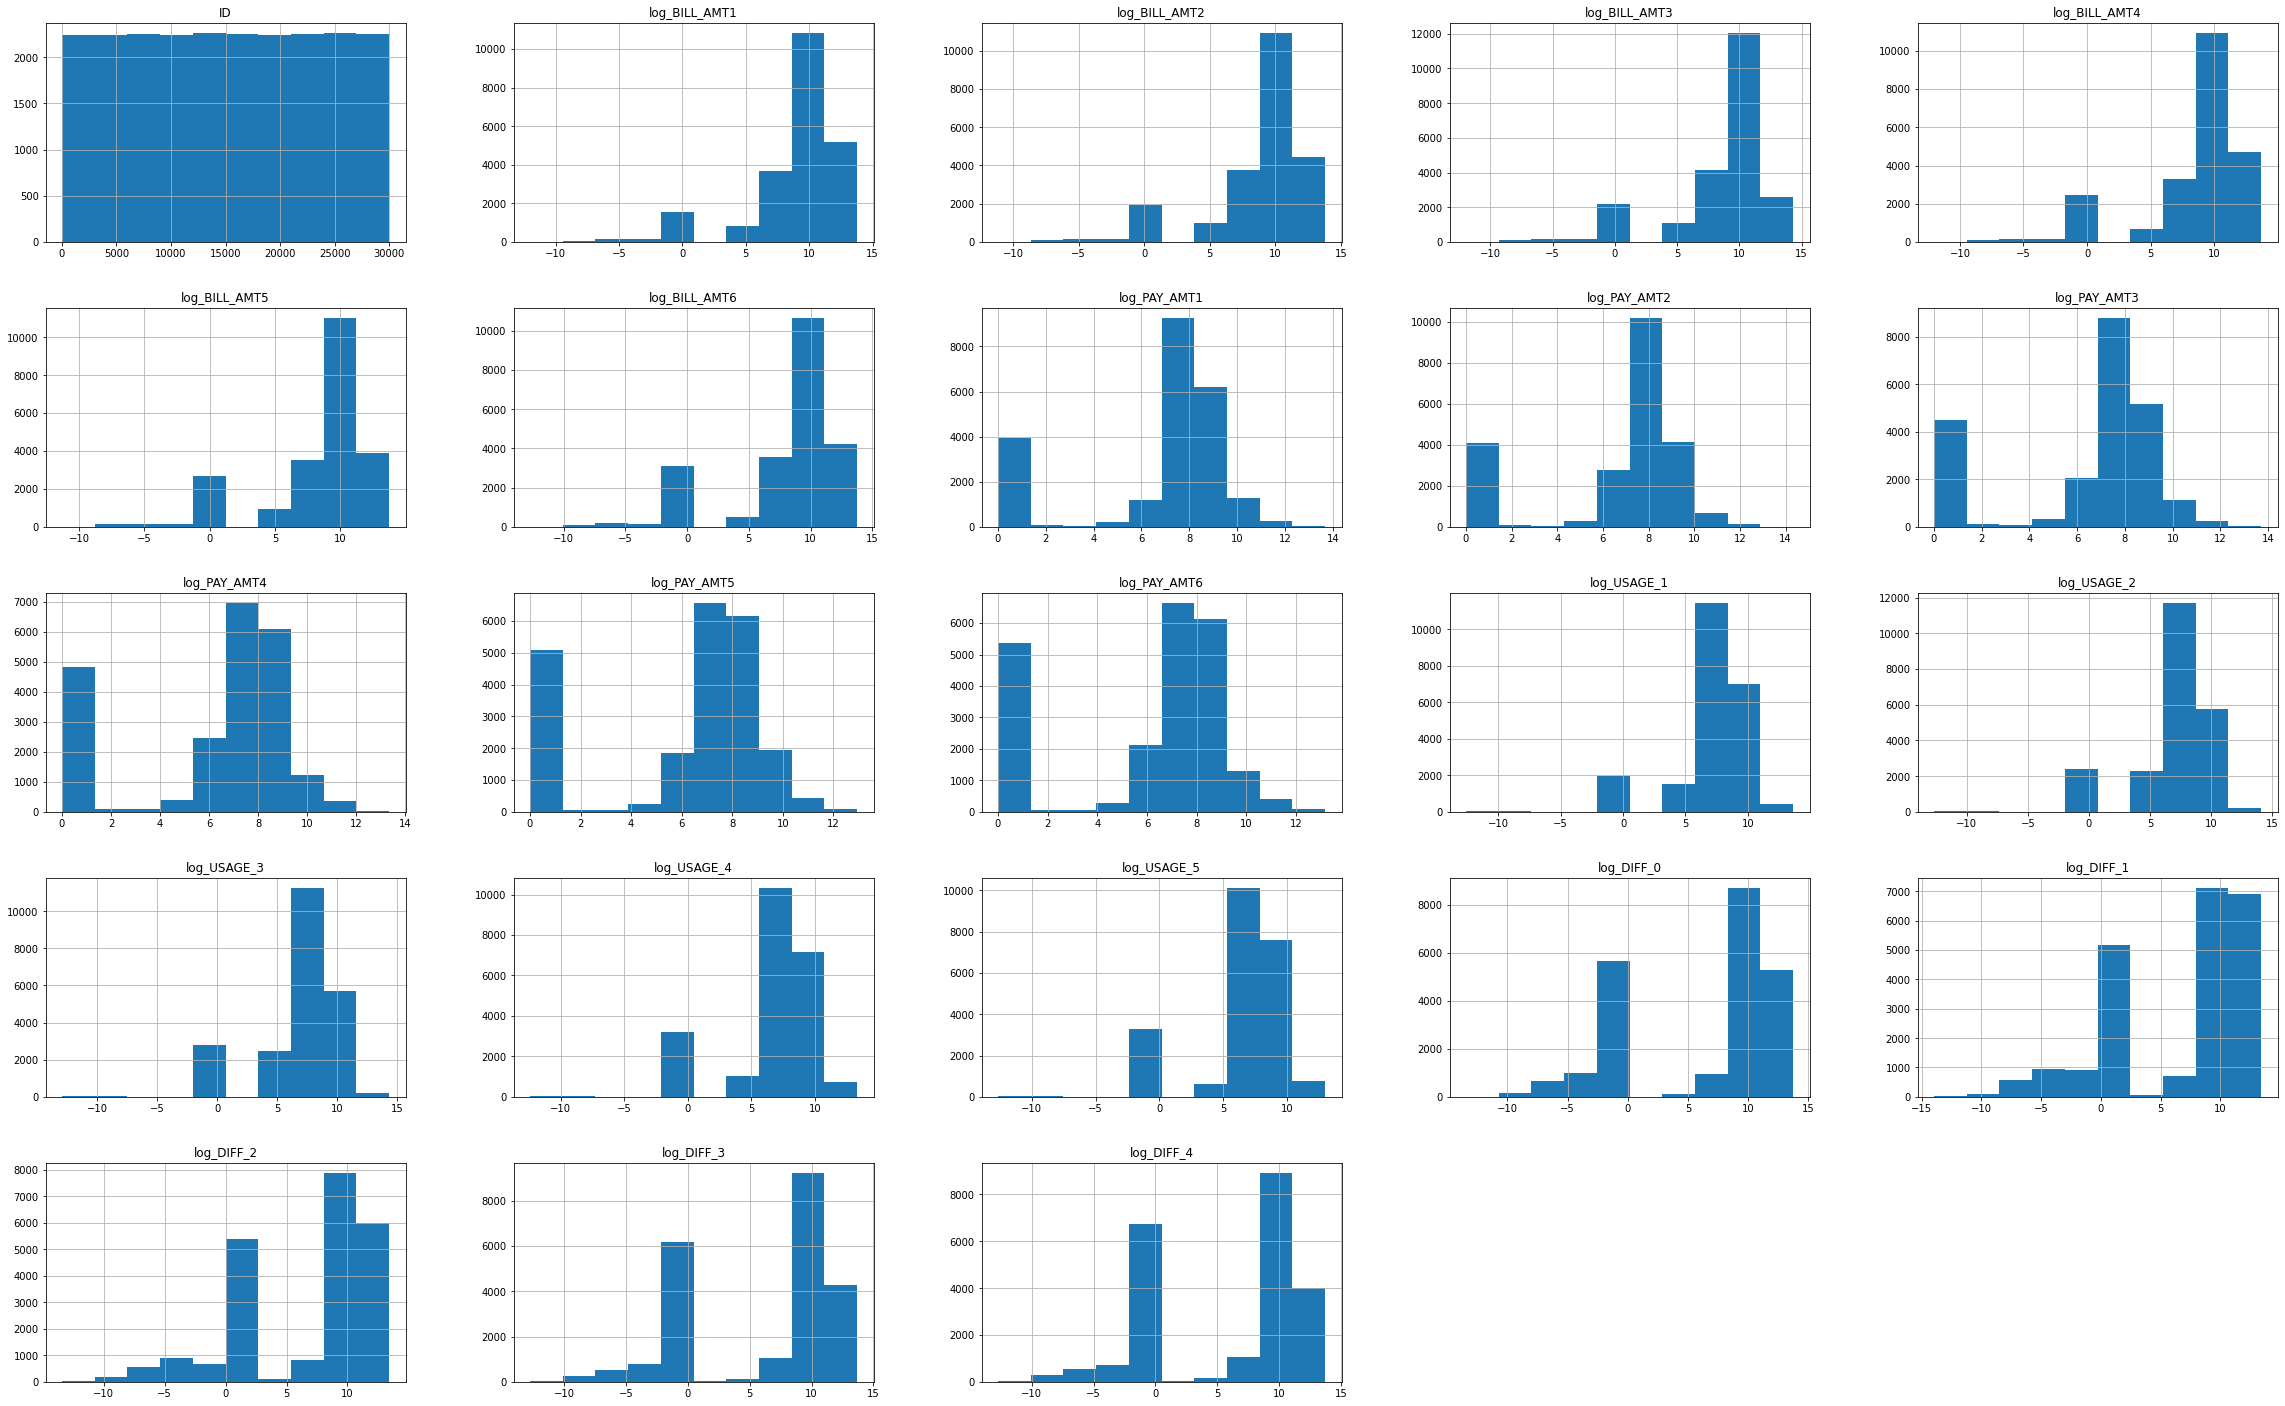

In [147]:
df_log.hist(figsize=(40,25))
plt.show()

## comparison with non log scale

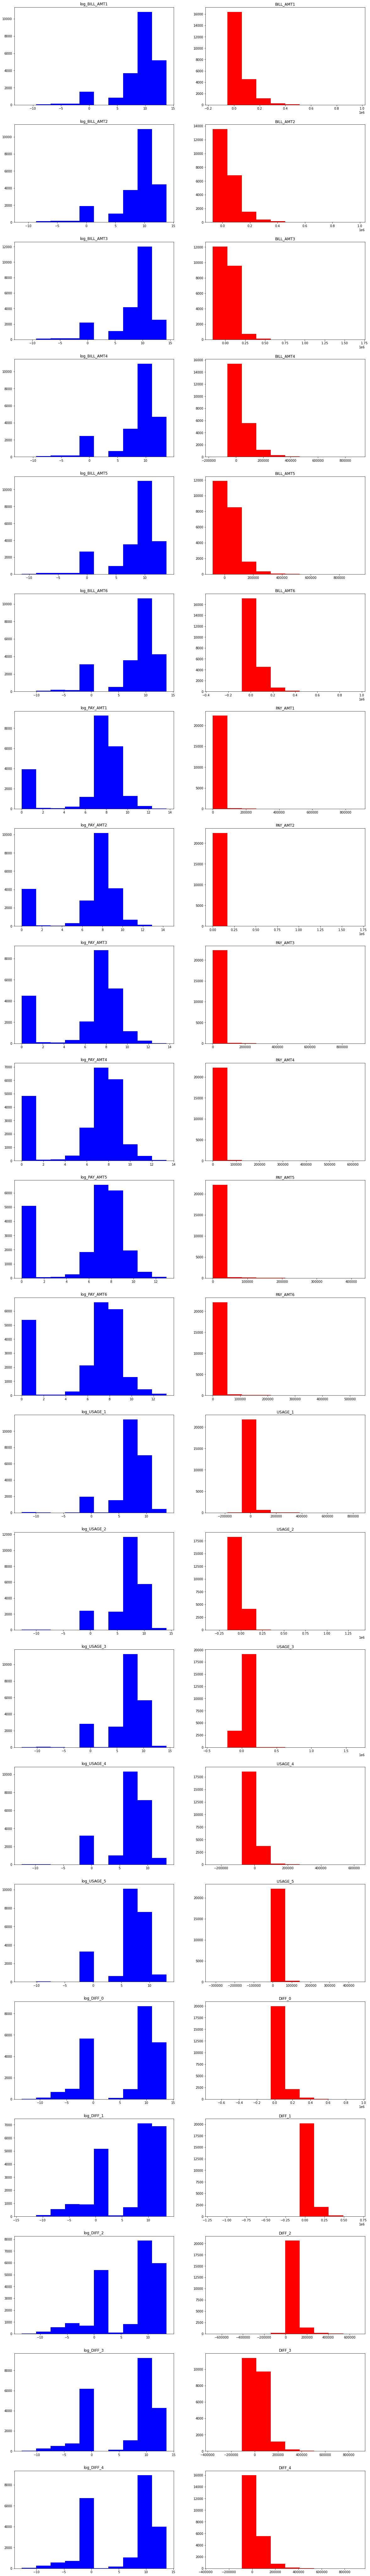

In [178]:
LIM = ['LIMIT_BAL']
N = LIM+BILL+PAY+USAGE+DIFF
n = len(N)
fig, axes = plt.subplots(n,2, num=1, clear=True, figsize=(20,150))

for i,column in enumerate(N):
    axes[i,0].hist(df_log[f'log_{column}'],color='b')
    axes[i,0].set_title(f'log_{column}')
for k,col_name in enumerate(N):
    axes[k,1].hist(df[col_name],color='r')
    axes[k,1].set_title(col_name)
plt.show()

In [149]:
df_log.describe()

,ID,log_BILL_AMT1,log_BILL_AMT2,log_BILL_AMT3,log_BILL_AMT4,log_BILL_AMT5,log_BILL_AMT6,log_PAY_AMT1,log_PAY_AMT2,log_PAY_AMT3,...,log_USAGE_1,log_USAGE_2,log_USAGE_3,log_USAGE_4,log_USAGE_5,log_DIFF_0,log_DIFF_1,log_DIFF_2,log_DIFF_3,log_DIFF_4
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,...,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,15012.082844,8.961128,8.752779,8.628328,8.470846,8.312005,8.079265,6.637738,6.567691,6.295680,...,7.123717,7.018532,6.925958,6.693992,6.522638,6.484952,6.338182,6.318266,6.303142,6.027422
std,8654.486826,3.550266,3.798758,3.886844,3.976221,4.030714,4.219371,3.244997,3.276876,3.351843,...,2.871602,3.077269,3.226634,3.287265,3.216493,5.865520,5.888375,5.803484,5.679524,5.753233
min,1.000000,-12.017216,-11.153074,-11.965688,-12.043560,-11.306332,-12.735536,0.000000,0.000000,0.000000,...,-12.592151,-12.696709,-12.937972,-12.432156,-12.663086,-13.454268,-13.981931,-13.434416,-12.781477,-12.735536
25%,7523.500000,8.190909,8.039480,7.928406,7.783224,7.512481,7.136284,6.908755,6.746412,5.983936,...,6.426488,6.359141,6.222576,5.983936,5.968708,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15013.000000,10.033572,9.985643,9.916478,9.861389,9.811619,9.754378,7.650645,7.606885,7.509883,...,7.630218,7.636270,7.590347,7.406711,7.259116,9.734033,9.686792,9.627998,9.522922,9.384714
75%,22496.250000,11.113772,11.061194,11.001737,10.908009,10.821637,10.804396,8.517993,8.517393,8.419470,...,8.785425,8.852129,8.943800,8.779134,8.540910,10.951986,10.886217,10.783762,10.734629,10.710482
max,30000.000000,13.779378,13.799312,14.324789,13.700758,13.739894,13.776421,13.680324,14.336837,13.705741,...,13.637123,14.121386,14.324833,13.340005,13.011961,13.746319,13.424901,13.425227,13.684458,13.723028


In [150]:
df[BILL+PAY].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000
mean,51245.067778,49206.147733,4.701756e+04,43418.400756,40429.360489,38946.791822,5650.333644,5.961813e+03,5315.743644,4881.652578,4794.299200,5260.496311
std,73507.326943,71120.080694,6.945343e+04,64511.798629,60983.707777,59701.813056,16688.006347,2.448806e+04,18169.839098,16304.685745,15238.981992,18312.417605
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3607.000000,3100.000000,2.774000e+03,2399.000000,1829.750000,1255.750000,1000.000000,8.500000e+02,396.000000,300.000000,240.750000,138.750000
50%,22777.500000,21711.500000,2.026050e+04,19174.500000,18243.500000,17228.500000,2101.000000,2.011000e+03,1825.000000,1500.000000,1500.000000,1500.000000
75%,67087.750000,63651.500000,5.997725e+04,54611.000000,50092.000000,49235.750000,5003.000000,5.000000e+03,4533.500000,4006.250000,4003.000000,4000.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,417990.000000,528666.000000


In [151]:
df_log

,ID,log_BILL_AMT1,log_BILL_AMT2,log_BILL_AMT3,log_BILL_AMT4,log_BILL_AMT5,log_BILL_AMT6,log_PAY_AMT1,log_PAY_AMT2,log_PAY_AMT3,...,log_USAGE_1,log_USAGE_2,log_USAGE_3,log_USAGE_4,log_USAGE_5,log_DIFF_0,log_DIFF_1,log_DIFF_2,log_DIFF_3,log_DIFF_4
20349,20350,11.277216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.277216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6983,6984,5.743003,6.722630,5.420535,0.000000,0.000000,0.000000,6.725034,5.420535,0.000000,...,5.749393,6.722630,5.420535,0.000000,0.000000,-1.098612,0.000000,0.000000,0.000000,0.000000
17548,17549,10.835789,10.839208,10.856592,10.855319,9.737551,9.758231,7.601402,7.650169,7.244942,...,7.510431,7.095893,7.290975,10.476386,6.472346,10.799188,10.815268,10.827925,9.701494,9.698675
954,955,7.787797,7.674153,7.678789,7.450080,11.586102,11.589340,7.674153,7.678789,7.450080,...,7.787797,7.674153,7.678789,7.450080,8.445053,0.000000,0.000000,0.000000,0.000000,11.541911
12866,12867,9.913240,9.885273,9.752607,9.564793,9.824228,9.538132,7.227662,7.022868,6.133398,...,7.567346,8.178077,8.133294,7.483807,8.560636,9.812632,9.685207,9.531989,9.431562,9.492130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22066,22067,7.886081,8.258422,9.278933,9.068546,8.370779,7.886081,8.258422,9.278933,6.908755,...,7.886081,8.258422,8.017308,8.402904,7.886081,0.000000,0.000000,8.946114,8.347353,7.414573
19277,19278,7.911324,7.426549,6.340359,11.029472,10.973049,10.973049,7.426549,6.340359,11.029472,...,7.911324,7.426549,6.340359,8.126814,0.000000,0.000000,0.000000,0.000000,10.973049,10.973049
23975,23976,10.192232,9.239802,9.186969,9.082393,9.148997,8.834191,7.090910,7.601402,7.601402,...,9.775484,7.836370,7.996654,5.978886,8.172164,9.115920,8.957897,8.824531,9.036582,8.676758
12381,12382,0.000000,6.463029,10.366057,10.667466,7.809947,7.837160,6.463029,10.366120,10.858749,...,0.000000,6.466145,10.616780,11.466588,7.809947,0.000000,-1.098612,-9.110741,-10.869273,0.000000


In [152]:
df[BILL+PAY]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
20349,79000,0,0,0,0,0,0,0,0,0,0,0
6983,311,830,225,0,0,0,832,225,0,0,0,0
17548,50806,50980,51874,51808,16941,17295,2000,2100,1400,600,1000,1000
954,2410,2151,2161,1719,107591,107940,2151,2161,1719,107591,5000,3500
12866,20195,19638,17198,14253,18475,13878,1376,1121,460,6000,624,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
22066,2659,3859,10709,8677,4318,2659,3859,10709,1000,100,1000,2856
19277,2727,1679,566,61664,58281,58281,1679,566,61664,0,0,4480
23975,26694,10298,9768,8798,9404,6864,1200,2000,2000,1000,1000,1000
12381,0,640,31762,42935,2464,2532,640,31764,51986,55000,2532,5717


## divided Defaults and non_Defaults

In [157]:
df =pd.concat([df,
               df_log[[column for column in df_log.columns if column !='ID']]],axis=1)

In [158]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'USAGE_1', 'USAGE_2', 'USAGE_3', 'USAGE_4', 'USAGE_5', 'DIFF_0',
       'DIFF_1', 'DIFF_2', 'DIFF_3', 'DIFF_4', 'log_BILL_AMT1',
       'log_BILL_AMT2', 'log_BILL_AMT3', 'log_BILL_AMT4', 'log_BILL_AMT5',
       'log_BILL_AMT6', 'log_PAY_AMT1', 'log_PAY_AMT2', 'log_PAY_AMT3',
       'log_PAY_AMT4', 'log_PAY_AMT5', 'log_PAY_AMT6', 'log_USAGE_1',
       'log_USAGE_2', 'log_USAGE_3', 'log_USAGE_4', 'log_USAGE_5',
       'log_DIFF_0', 'log_DIFF_1', 'log_DIFF_2', 'log_DIFF_3', 'log_DIFF_4'],
      dtype='object')

In [159]:
defaults =df.loc[df.default==1]

In [160]:
defaults.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_USAGE_1,log_USAGE_2,log_USAGE_3,log_USAGE_4,log_USAGE_5,log_DIFF_0,log_DIFF_1,log_DIFF_2,log_DIFF_3,log_DIFF_4
17548,17549,60000,2,2,1,48,0,0,0,0,...,7.510431,7.095893,7.290975,10.476386,6.472346,10.799188,10.815268,10.827925,9.701494,9.698675
8944,8945,100000,2,2,1,42,2,2,0,0,...,7.829630,8.675734,8.245122,8.861917,7.355641,11.502693,11.441827,11.440763,11.407354,11.428641
15574,15575,50000,1,2,1,51,0,0,0,0,...,6.909753,8.723882,8.651025,9.068085,8.582606,10.576355,10.465785,10.353894,10.096296,9.966650
16477,16478,80000,2,2,1,54,2,2,2,2,...,7.000334,6.991177,7.024649,7.024649,6.887553,10.762213,10.785539,10.805558,10.823192,10.803486
1086,1087,410000,2,2,1,41,0,0,0,0,...,8.601718,9.147507,9.615672,9.472858,9.636653,12.763019,12.777834,12.779253,12.782065,12.777176


In [161]:
non_defaults = df.loc[df.default==0]

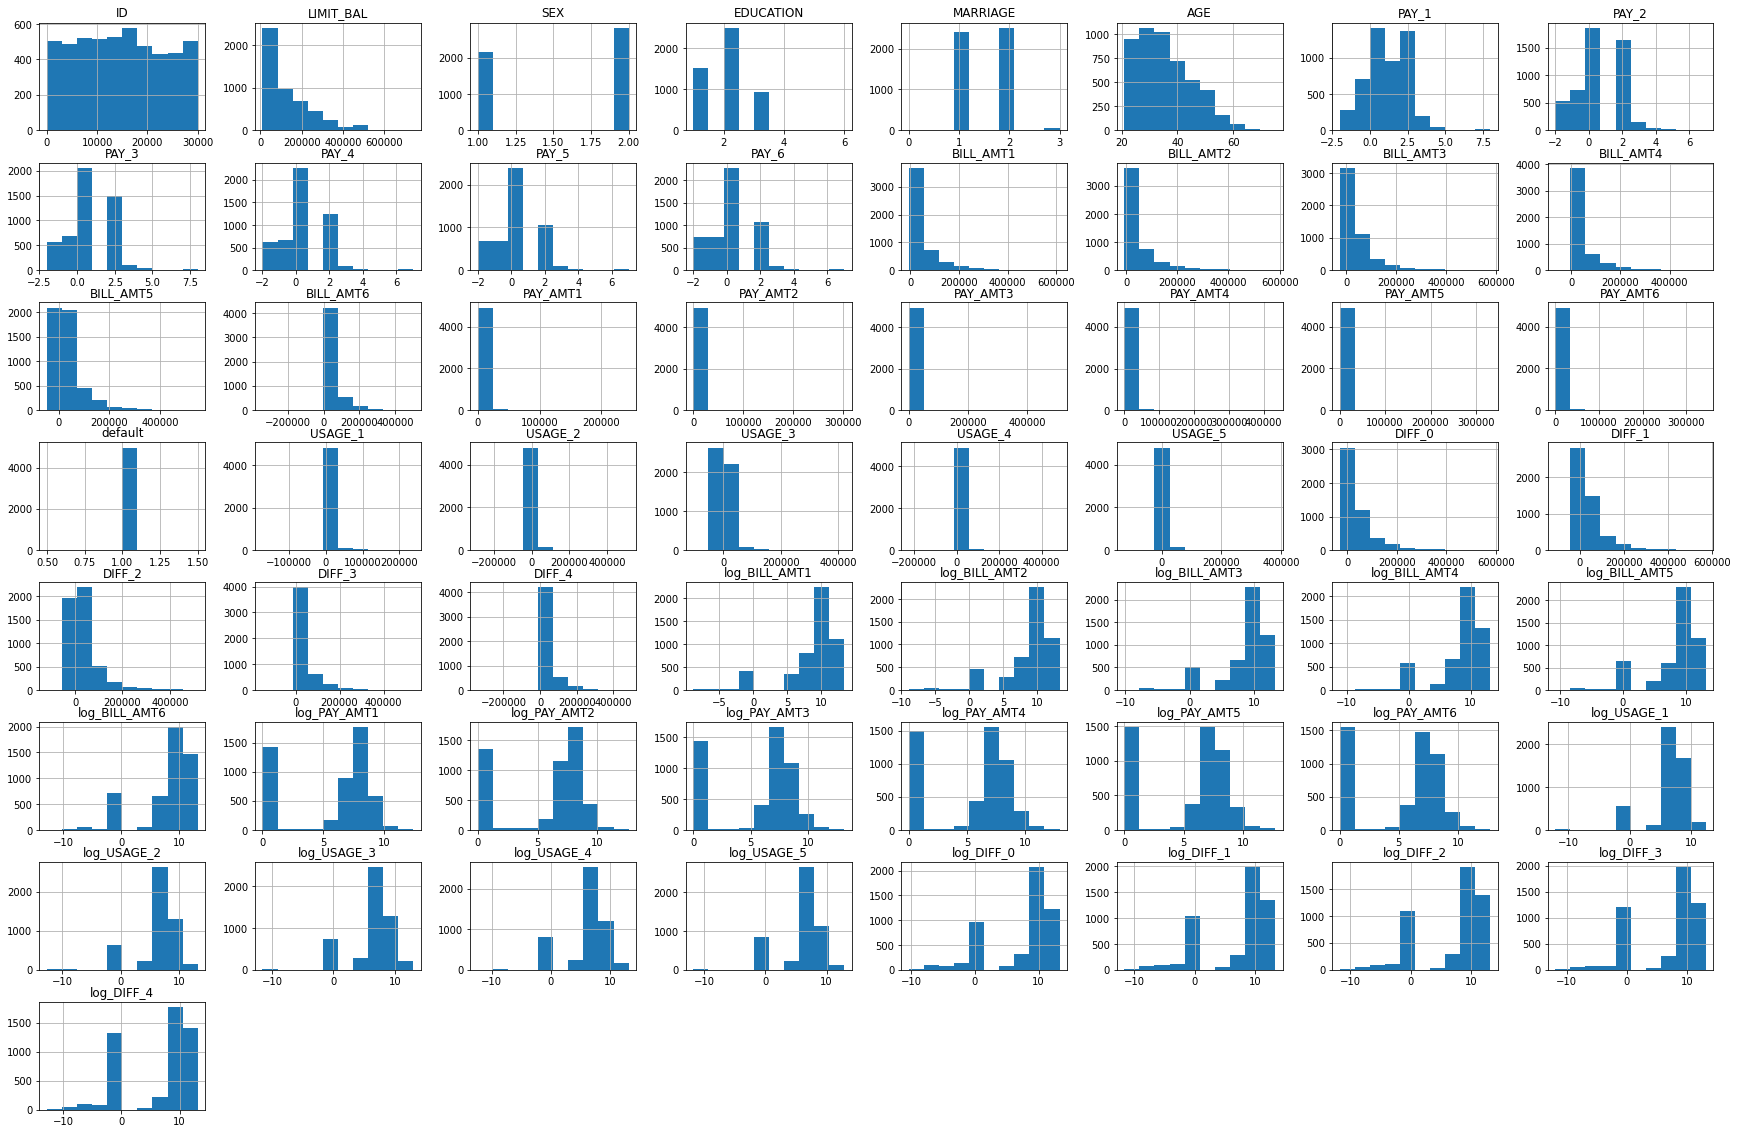

In [162]:
defaults.hist(figsize=(30,20))
plt.show()

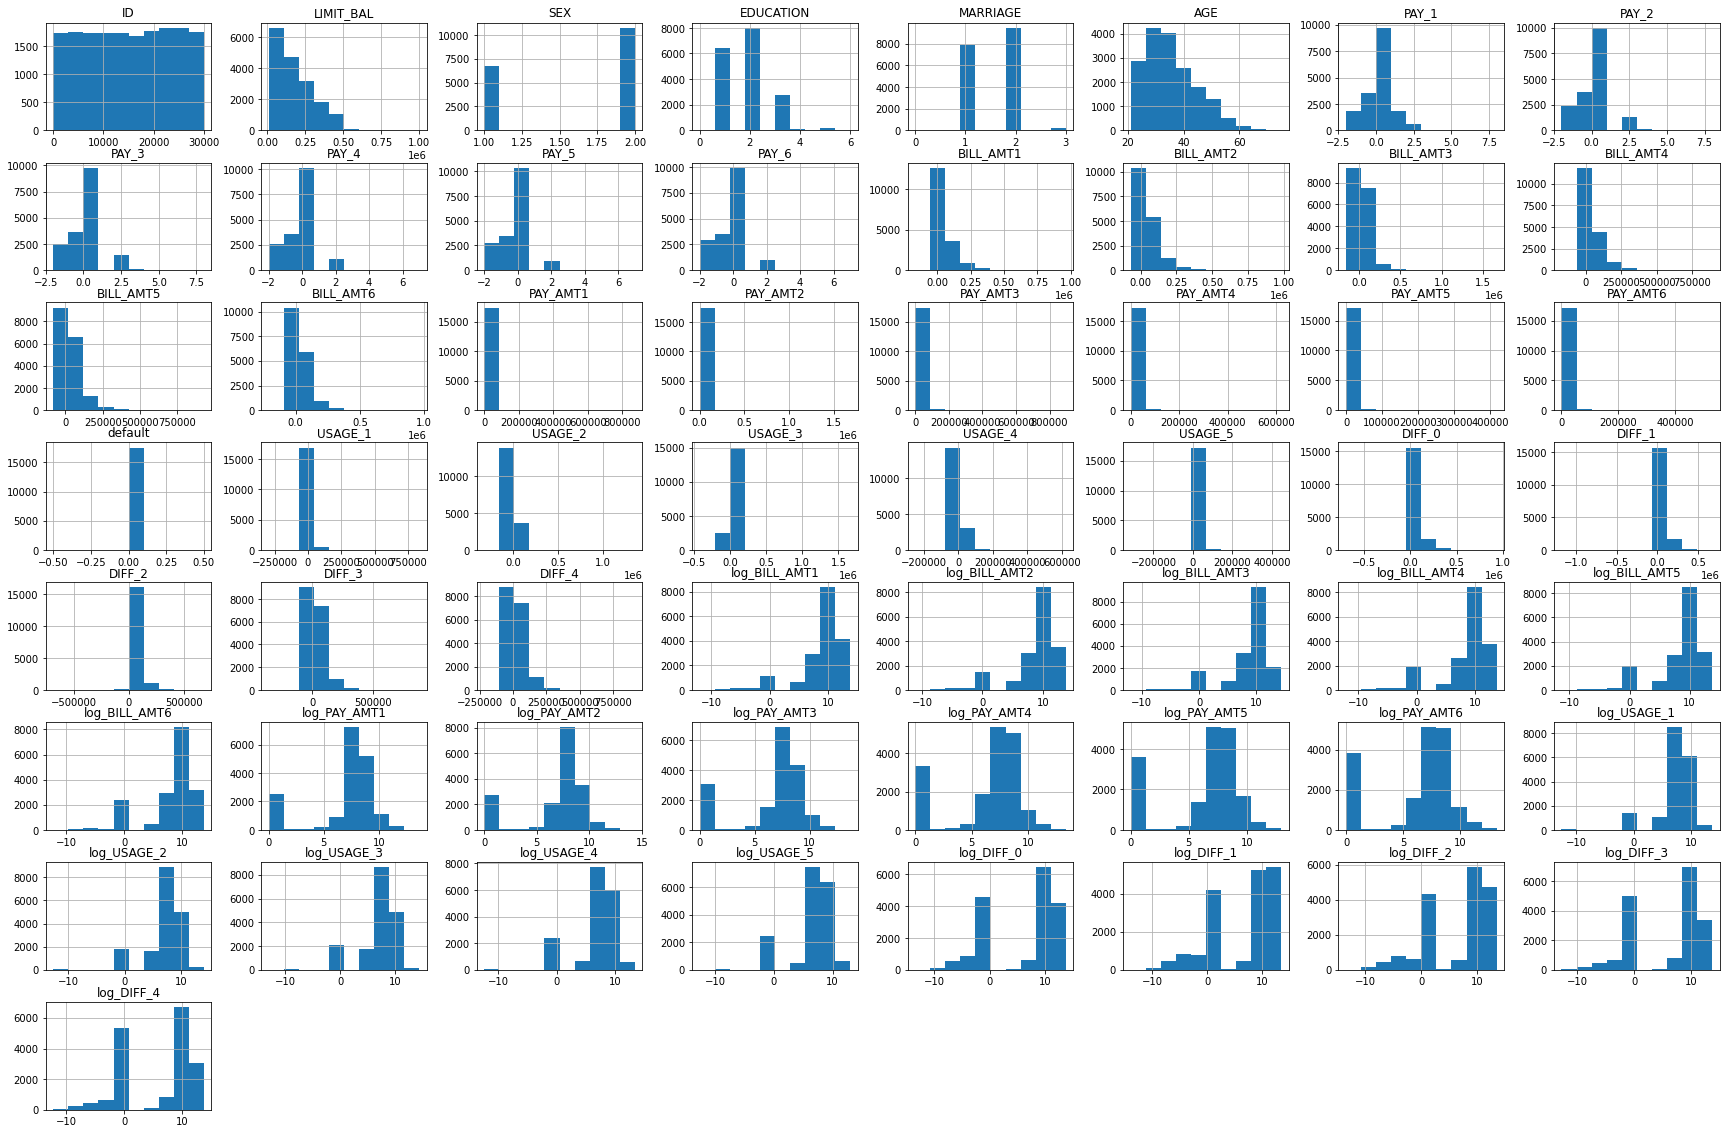

In [163]:
non_defaults.hist(figsize=(30,20))
plt.show()

In [164]:
non_defaults.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_USAGE_1,log_USAGE_2,log_USAGE_3,log_USAGE_4,log_USAGE_5,log_DIFF_0,log_DIFF_1,log_DIFF_2,log_DIFF_3,log_DIFF_4
20349,20350,80000,1,1,2,25,2,2,-2,-2,...,11.277216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6983,6984,300000,2,1,1,51,-1,-1,-1,-1,...,5.749393,6.722630,5.420535,0.000000,0.000000,-1.098612,0.000000,0.000000,0.000000,0.000000
954,955,110000,2,2,1,46,-1,-1,-1,-1,...,7.787797,7.674153,7.678789,7.450080,8.445053,0.000000,0.000000,0.000000,0.000000,11.541911
12866,12867,20000,2,2,2,25,0,0,0,0,...,7.567346,8.178077,8.133294,7.483807,8.560636,9.812632,9.685207,9.531989,9.431562,9.492130
24976,24977,420000,1,2,1,38,0,0,0,0,...,8.726481,8.511376,8.718664,11.826312,8.142063,12.568073,12.586914,12.606820,12.073033,12.093201


In [165]:
non_defaults.iloc[0]

ID               20350.000000
LIMIT_BAL        80000.000000
SEX                  1.000000
EDUCATION            1.000000
MARRIAGE             2.000000
AGE                 25.000000
PAY_1                2.000000
PAY_2                2.000000
PAY_3               -2.000000
PAY_4               -2.000000
PAY_5               -2.000000
PAY_6               -2.000000
BILL_AMT1        79000.000000
BILL_AMT2            0.000000
BILL_AMT3            0.000000
BILL_AMT4            0.000000
BILL_AMT5            0.000000
BILL_AMT6            0.000000
PAY_AMT1             0.000000
PAY_AMT2             0.000000
PAY_AMT3             0.000000
PAY_AMT4             0.000000
PAY_AMT5             0.000000
PAY_AMT6             0.000000
default              0.000000
USAGE_1          79000.000000
USAGE_2              0.000000
USAGE_3              0.000000
USAGE_4              0.000000
USAGE_5              0.000000
DIFF_0               0.000000
DIFF_1               0.000000
DIFF_2               0.000000
DIFF_3    

In [166]:
non_defaults.iloc[3]

ID               12867.000000
LIMIT_BAL        20000.000000
SEX                  2.000000
EDUCATION            2.000000
MARRIAGE             2.000000
AGE                 25.000000
PAY_1                0.000000
PAY_2                0.000000
PAY_3                0.000000
PAY_4                0.000000
PAY_5                0.000000
PAY_6                0.000000
BILL_AMT1        20195.000000
BILL_AMT2        19638.000000
BILL_AMT3        17198.000000
BILL_AMT4        14253.000000
BILL_AMT5        18475.000000
BILL_AMT6        13878.000000
PAY_AMT1          1376.000000
PAY_AMT2          1121.000000
PAY_AMT3           460.000000
PAY_AMT4          6000.000000
PAY_AMT5           624.000000
PAY_AMT6          2000.000000
default              0.000000
USAGE_1           1933.000000
USAGE_2           3561.000000
USAGE_3           3405.000000
USAGE_4           1778.000000
USAGE_5           5221.000000
DIFF_0           18262.000000
DIFF_1           16077.000000
DIFF_2           13793.000000
DIFF_3    

In [167]:
defaults.iloc[0]

ID               17549.000000
LIMIT_BAL        60000.000000
SEX                  2.000000
EDUCATION            2.000000
MARRIAGE             1.000000
AGE                 48.000000
PAY_1                0.000000
PAY_2                0.000000
PAY_3                0.000000
PAY_4                0.000000
PAY_5                0.000000
PAY_6                0.000000
BILL_AMT1        50806.000000
BILL_AMT2        50980.000000
BILL_AMT3        51874.000000
BILL_AMT4        51808.000000
BILL_AMT5        16941.000000
BILL_AMT6        17295.000000
PAY_AMT1          2000.000000
PAY_AMT2          2100.000000
PAY_AMT3          1400.000000
PAY_AMT4           600.000000
PAY_AMT5          1000.000000
PAY_AMT6          1000.000000
default              1.000000
USAGE_1           1826.000000
USAGE_2           1206.000000
USAGE_3           1466.000000
USAGE_4          35467.000000
USAGE_5            646.000000
DIFF_0           48980.000000
DIFF_1           49774.000000
DIFF_2           50408.000000
DIFF_3    

In [168]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_USAGE_1,log_USAGE_2,log_USAGE_3,log_USAGE_4,log_USAGE_5,log_DIFF_0,log_DIFF_1,log_DIFF_2,log_DIFF_3,log_DIFF_4
20349,20350,80000,1,1,2,25,2,2,-2,-2,...,11.277216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6983,6984,300000,2,1,1,51,-1,-1,-1,-1,...,5.749393,6.722630,5.420535,0.000000,0.000000,-1.098612,0.000000,0.000000,0.000000,0.000000
17548,17549,60000,2,2,1,48,0,0,0,0,...,7.510431,7.095893,7.290975,10.476386,6.472346,10.799188,10.815268,10.827925,9.701494,9.698675
954,955,110000,2,2,1,46,-1,-1,-1,-1,...,7.787797,7.674153,7.678789,7.450080,8.445053,0.000000,0.000000,0.000000,0.000000,11.541911
12866,12867,20000,2,2,2,25,0,0,0,0,...,7.567346,8.178077,8.133294,7.483807,8.560636,9.812632,9.685207,9.531989,9.431562,9.492130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22066,22067,160000,2,1,2,26,-1,-1,-1,0,...,7.886081,8.258422,8.017308,8.402904,7.886081,0.000000,0.000000,8.946114,8.347353,7.414573
19277,19278,80000,2,2,1,41,-1,-1,-1,-1,...,7.911324,7.426549,6.340359,8.126814,0.000000,0.000000,0.000000,0.000000,10.973049,10.973049
23975,23976,20000,1,1,2,25,0,0,0,0,...,9.775484,7.836370,7.996654,5.978886,8.172164,9.115920,8.957897,8.824531,9.036582,8.676758
12381,12382,500000,2,1,2,35,1,-1,-1,-1,...,0.000000,6.466145,10.616780,11.466588,7.809947,0.000000,-1.098612,-9.110741,-10.869273,0.000000


In [169]:
import random 

In [170]:
defaults.iloc[random.randint(0,100)]

ID                 8585.000000
LIMIT_BAL        360000.000000
SEX                   1.000000
EDUCATION             2.000000
MARRIAGE              1.000000
AGE                  49.000000
PAY_1                 1.000000
PAY_2                -2.000000
PAY_3                -1.000000
PAY_4                -1.000000
PAY_5                -2.000000
PAY_6                -2.000000
BILL_AMT1             0.000000
BILL_AMT2             0.000000
BILL_AMT3          8209.000000
BILL_AMT4           -41.000000
BILL_AMT5           -41.000000
BILL_AMT6           -41.000000
PAY_AMT1              0.000000
PAY_AMT2           8209.000000
PAY_AMT3              0.000000
PAY_AMT4              0.000000
PAY_AMT5              0.000000
PAY_AMT6              0.000000
default               1.000000
USAGE_1               0.000000
USAGE_2               0.000000
USAGE_3            8250.000000
USAGE_4               0.000000
USAGE_5               0.000000
DIFF_0                0.000000
DIFF_1                0.000000
DIFF_2  

In [171]:
defaults.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_USAGE_1,log_USAGE_2,log_USAGE_3,log_USAGE_4,log_USAGE_5,log_DIFF_0,log_DIFF_1,log_DIFF_2,log_DIFF_3,log_DIFF_4
17548,17549,60000,2,2,1,48,0,0,0,0,...,7.510431,7.095893,7.290975,10.476386,6.472346,10.799188,10.815268,10.827925,9.701494,9.698675
8944,8945,100000,2,2,1,42,2,2,0,0,...,7.829630,8.675734,8.245122,8.861917,7.355641,11.502693,11.441827,11.440763,11.407354,11.428641
15574,15575,50000,1,2,1,51,0,0,0,0,...,6.909753,8.723882,8.651025,9.068085,8.582606,10.576355,10.465785,10.353894,10.096296,9.966650
16477,16478,80000,2,2,1,54,2,2,2,2,...,7.000334,6.991177,7.024649,7.024649,6.887553,10.762213,10.785539,10.805558,10.823192,10.803486
1086,1087,410000,2,2,1,41,0,0,0,0,...,8.601718,9.147507,9.615672,9.472858,9.636653,12.763019,12.777834,12.779253,12.782065,12.777176


In [172]:
non_defaults.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_USAGE_1,log_USAGE_2,log_USAGE_3,log_USAGE_4,log_USAGE_5,log_DIFF_0,log_DIFF_1,log_DIFF_2,log_DIFF_3,log_DIFF_4
count,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,...,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000
mean,15089.808423,178151.115677,1.614164,1.842550,1.558637,35.436398,-0.213091,-0.302859,-0.313417,-0.353935,...,7.310352,7.183937,7.073518,6.836177,6.660287,6.251456,6.094423,6.094916,6.115348,5.839882
std,8679.597414,131940.205300,0.486806,0.808675,0.520907,9.086993,0.943451,1.030239,1.052571,1.009398,...,2.844996,3.049633,3.216739,3.279925,3.219518,6.014747,6.024363,5.929150,5.782117,5.835861
min,3.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-12.592151,-12.696709,-12.937972,-12.432156,-12.663086,-13.454268,-13.981931,-13.434416,-12.781477,-12.279119
25%,7559.500000,60000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,6.597146,6.501290,6.356108,6.102559,6.042633,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15126.000000,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,7.823646,7.816417,7.772753,7.584773,7.426549,9.704976,9.643810,9.558247,9.430840,9.245321
75%,22637.500000,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,8.942984,9.005528,9.069410,8.920188,8.676076,10.969835,10.903899,10.792027,10.742152,10.716116
max,29997.000000,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,7.000000,...,13.637123,14.121386,14.324833,13.340005,13.011961,13.746319,13.424901,13.425227,13.684458,13.723028


In [173]:
defaults.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_USAGE_1,log_USAGE_2,log_USAGE_3,log_USAGE_4,log_USAGE_5,log_DIFF_0,log_DIFF_1,log_DIFF_2,log_DIFF_3,log_DIFF_4
count,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,...,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000
mean,14738.426964,130230.596745,1.567008,1.898935,1.528833,35.709263,0.669681,0.452481,0.356440,0.249950,...,6.466612,6.436173,6.406428,6.193388,6.038004,7.307044,7.196410,7.104637,6.964324,6.687714
std,8560.742005,115396.277193,0.495539,0.730338,0.524732,9.639402,1.391505,1.511279,1.484085,1.493896,...,2.868587,3.103572,3.207980,3.264378,3.158749,5.224989,5.294288,5.263194,5.249897,5.401339
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-12.052152,-12.554692,-11.548408,-12.325636,-11.745267,-10.331399,-11.630948,-11.679219,-11.921532,-12.735536
25%,7428.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,...,5.968708,5.968708,5.834811,5.710427,5.700444,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14586.000000,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,...,6.957497,6.961296,6.942157,6.818924,6.729824,9.789142,9.781207,9.753478,9.709963,9.657587
75%,21782.000000,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,...,8.142063,8.220134,8.311890,8.161375,7.947679,10.885135,10.832714,10.762869,10.705242,10.689351
max,30000.000000,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,7.000000,...,12.377123,13.147351,12.948964,13.089249,12.847637,13.268671,13.258079,13.155165,13.188804,13.087217


## Histogram with Comparison red=defaults

In [174]:
defaults.default.describe()

count    4977.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: default, dtype: float64

In [175]:
non_defaults.default.describe()

count    17523.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: default, dtype: float64

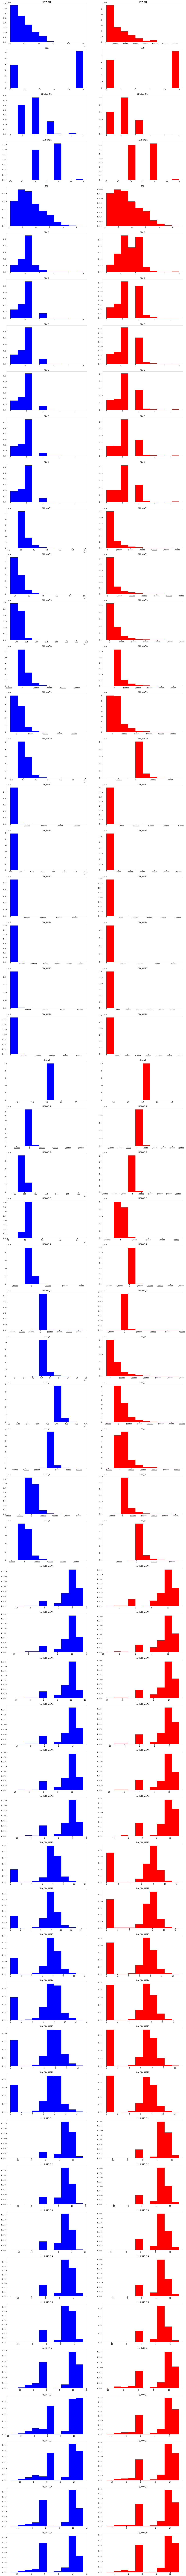

In [176]:
n = len(df.columns)-1
fig, axes = plt.subplots(n,2, num=1, clear=True,figsize=(20,300))

for i in range(n):
    axes[i,0].hist(non_defaults.iloc[:,i+1],density=True , color='b')
    axes[i,0].set_title(df.columns[i+1])

for i in range(n):
    axes[i,1].hist(defaults.iloc[:,i+1],density=True , color='r')
    axes[i,1].set_title(df.columns[i+1])
plt.show()